# About
Rough analysis of Annual Tornado Count in America.

The purpose is to see whether there's any trend over time, possibly related to climate change.

##### Data Description
Source:
* National Oceanic and Atmospheric Administration: [https://www.ncdc.noaa.gov/stormevents/](https://www.ncdc.noaa.gov/stormevents/)

Method:
* I manually downloaded 15 csv files covering 1950 to 2020
* I wanted to just download one file but the page is limited to 500 entries so I had to break it into parts.

Selection:
* All States
* Tornado F3/EF3 and stronger

Note:
* For some years the files fail to load
* This is due to messy formatting
* For example there is confusion around new lines and commas in comments get read as delimeters.

##### Related Link
* Blog Post: https://ronanmcgovern.com/2021/06/10/reading-the-science-of-human-caused-climate-change-part-1-data/

In [1]:
import os, sys

import pandas as pd

In [2]:
folder = '../data/Tornados - F3 and Stronger - 1950-2020 inclusive/'

In [3]:
filenames = os.listdir(folder)
filenames

['storm_data_search_results (1).csv',
 'storm_data_search_results (10).csv',
 'storm_data_search_results (11).csv',
 'storm_data_search_results (12).csv',
 'storm_data_search_results (13).csv',
 'storm_data_search_results (14).csv',
 'storm_data_search_results (15).csv',
 'storm_data_search_results (2).csv',
 'storm_data_search_results (3).csv',
 'storm_data_search_results (4).csv',
 'storm_data_search_results (5).csv',
 'storm_data_search_results (6).csv',
 'storm_data_search_results (7).csv',
 'storm_data_search_results (8).csv',
 'storm_data_search_results (9).csv']

In [4]:
# Helper function
def read_tornado_csv(filename, folder):
    """Read tornado csv file to dataframe."""
    
    filepath = folder + filename
    
    df = pd.read_csv(filepath,
                     parse_dates=['BEGIN_DATE', 'END_DATE'],
                     dayfirst=False
                    )
    return df

In [5]:
# Load the files into a list of tables
sub_tables = []

for filename in filenames:

    try:  # Read csv to dataframe
        df = read_tornado_csv(filename, folder)
        
        sub_tables.append(df)
        
    # Skip files that fail to load
    except pd.errors.ParserError:
        
        message = f"""{filename}
                   ParseError: Check file for inconsistent formatting.
                   Detailed Message: {sys.exc_info()[1]}"""
        print(message)        

storm_data_search_results (10).csv
                   ParseError: Check file for inconsistent formatting.
                   Detailed Message: Error tokenizing data. C error: Expected 39 fields in line 298, saw 40

storm_data_search_results (11).csv
                   ParseError: Check file for inconsistent formatting.
                   Detailed Message: Error tokenizing data. C error: Expected 39 fields in line 11, saw 42

storm_data_search_results (12).csv
                   ParseError: Check file for inconsistent formatting.
                   Detailed Message: Error tokenizing data. C error: Expected 39 fields in line 165, saw 41

storm_data_search_results (13).csv
                   ParseError: Check file for inconsistent formatting.
                   Detailed Message: Error tokenizing data. C error: Expected 39 fields in line 11, saw 41



In [6]:
# Merge the list of tables into a single table        
df = pd.concat(sub_tables)
df.head()

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,10063615,ST. LOUIS CO.,,1950-01-03,1100,Tornado,0,F3,0,3,...,,1950-01-03,1100,38.77,-90.22,38.82,-90.12,NaN,NaN,1
1,10009710,MADISON CO.,,1950-01-03,1110,Tornado,0,F3,0,0,...,,1950-01-03,1110,38.82,-90.10,38.83,-90.03,NaN,NaN,2
2,10009711,MONTGOMERY CO.,,1950-01-03,1155,Tornado,0,F3,0,3,...,,1950-01-03,1155,39.10,-89.30,39.12,-89.23,NaN,NaN,3
3,9981922,POLK CO.,,1950-01-13,525,Tornado,0,F3,1,1,...,,1950-01-13,525,34.40,-94.37,,,NaN,NaN,4
4,10120403,HARRIS CO.,,1950-02-11,1350,Tornado,0,F3,1,12,...,,1950-02-11,1350,29.67,-95.05,29.83,-95.00,NaN,NaN,5


# Aggregate
Count the number of Tornados per year.

In [7]:
# Count
annual_tornado_count = df.BEGIN_DATE.groupby(df.BEGIN_DATE.dt.year).count()

annual_tornado_count

BEGIN_DATE
1950     45
1951     33
1952     69
1953    106
1954     73
1955     57
1956     94
1957    135
1958     66
1959     54
1960     68
1961    115
1962     49
1963     51
1964     77
1965    167
1966     44
1967     88
1968     84
1969     81
1970     75
1971    125
1972     59
1973    131
1974    255
1975     57
1976     99
1977     68
1978     41
1979     53
1980     54
1981     38
1982    119
1983     78
1984    116
1985     79
1986     42
1987     26
1988     40
1989     39
2010     63
2011    140
2012     45
2013     36
2014     36
2015     32
2016     29
2017     22
2018     12
2019     48
2020     32
Name: BEGIN_DATE, dtype: int64

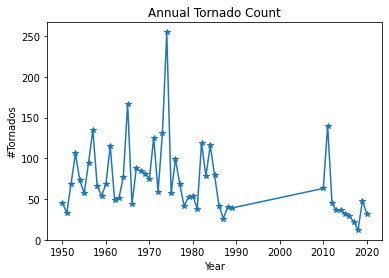

In [8]:
# Plot
annual_tornado_count.plot(marker='*',
                          title='Annual Tornado Count', 
                          xlabel='Year',
                          ylabel='#Tornados');